#**Handwritten digits classification using Deep Learning**

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

**1. loading the data**

In [3]:
(x_train , y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
x_train[0].shape

(28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**2.Visualising the picture of x train**

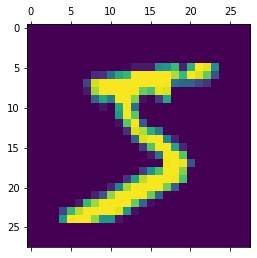

In [6]:
plt.matshow(x_train[0])

**3.flattening the data**

In [7]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

**4.building , compiling and executing the model**

In [24]:
#building model
model = keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
#compiling model
model.compile(
    optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#fitting the model
model.fit(x_train_flatten,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 9.9822 - accuracy: 0.8404
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 6.1846 - accuracy: 0.8789
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.6249 - accuracy: 0.8831
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3781 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3449 - accuracy: 0.8870


**5.predicting the numbers**

In [19]:
y_predicted = model.predict(x_test_flatten)
np.argmax(y_predicted[10])

0

In [20]:
y_test[10]

0

**6.Evaluation**

In [21]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 5.5386 - accuracy: 0.9036


[5.5386457443237305, 0.9035999774932861]

**7.confusion matrix**

In [22]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels= y_test, predictions=y_predicted_labels )

Text(69.0, 0.5, 'Truth')

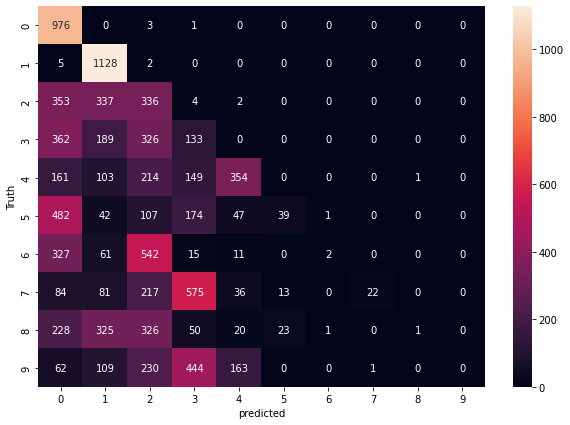

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt ='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

**8.Adding hidden layer**

In [27]:
#building model
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')])
#compiling model
model.compile(
    optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#fitting the model
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3756 - accuracy: 0.8375
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4052 - accuracy: 0.9041
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2935 - accuracy: 0.9241
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2500 - accuracy: 0.9356
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2252 - accuracy: 0.9424


In [28]:
y_predicted = model.predict(x_test_flatten)

In [29]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels= y_test, predictions=y_predicted_labels )

Text(69.0, 0.5, 'Truth')

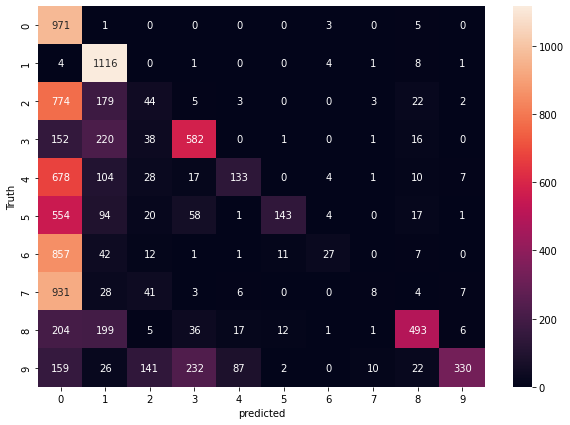

In [30]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt ='d')
plt.xlabel('predicted')
plt.ylabel('Truth')